# Motif interactive effect in the upstream of PER1 region

**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("config_sing.R")))
print(FD_WORK)
print(FD_RES)

[1] "/home/mount/work"
[1] "/home/mount/work/out/proj_combeffect"


**Check input file**

In [2]:
fdiry = file.path(FD_RES, "annotation_fragment")
fname = "target_PER1.bed.gz"
fglob = file.path(fdiry, "*", fname)
system(paste("ls -lh", fglob), intern = TRUE)

[1] "-rw-rw-r-- 1 kk319 reddylab 3.1M Sep 23 23:04 /home/mount/work/out/proj_combeffect/annotation_fragment/Input1_20x/target_PER1.bed.gz"
 [2] "-rw-rw-r-- 1 kk319 reddylab 187K Sep 23 23:04 /home/mount/work/out/proj_combeffect/annotation_fragment/Input1/target_PER1.bed.gz"    
 [3] "-rw-rw-r-- 1 kk319 reddylab 3.0M Sep 23 23:05 /home/mount/work/out/proj_combeffect/annotation_fragment/Input2_20x/target_PER1.bed.gz"
 [4] "-rw-rw-r-- 1 kk319 reddylab 218K Sep 23 23:05 /home/mount/work/out/proj_combeffect/annotation_fragment/Input2/target_PER1.bed.gz"    
 [5] "-rw-rw-r-- 1 kk319 reddylab 3.1M Sep 23 23:06 /home/mount/work/out/proj_combeffect/annotation_fragment/Input3_20x/target_PER1.bed.gz"
 [6] "-rw-rw-r-- 1 kk319 reddylab 280K Sep 23 23:06 /home/mount/work/out/proj_combeffect/annotation_fragment/Input3/target_PER1.bed.gz"    
 [7] "-rw-rw-r-- 1 kk319 reddylab 3.4M Sep 23 23:07 /home/mount/work/out/proj_combeffect/annotation_fragment/Input4_20x/target_PER1.bed.gz"
 [8] "-rw-rw-r-- 1 kk319 reddylab 199K Sep 23 23:07 /home/mount/work/out/proj_combeffect/annotation_fragment/Input4/target_PER1.bed.gz"    
 [9] "-rw-rw-r-- 1 kk319 reddylab 2.9M Sep 23 23:08 /home/mount/work/out/proj_combeffect/annotation_fragment/Input5_20x/target_PER1.bed.gz"
[10] "-rw-rw-r-- 1 kk319 reddylab 150K Sep 23 23:08 /home/mount/work/out/proj_combeffect/annotation_fragment/Input5/target_PER1.bed.gz"    
[11] "-rw-rw-r-- 1 kk319 reddylab 1.9M Sep 23 23:09 /home/mount/work/out/proj_combeffect/annotation_fragment/TFX2_Dex/target_PER1.bed.gz"  
[12] "-rw-rw-r-- 1 kk319 reddylab 769K Sep 23 23:09 /home/mount/work/out/proj_combeffect/annotation_fragment/TFX2_DMSO/target_PER1.bed.gz" 
[13] "-rw-rw-r-- 1 kk319 reddylab 1.3M Sep 23 23:10 /home/mount/work/out/proj_combeffect/annotation_fragment/TFX3_Dex/target_PER1.bed.gz"  
[14] "-rw-rw-r-- 1 kk319 reddylab 524K Sep 23 23:10 /home/mount/work/out/proj_combeffect/annotation_fragment/TFX3_DMSO/target_PER1.bed.gz" 
[15] "-rw-rw-r-- 1 kk319 reddylab 1.7M Sep 23 23:11 /home/mount/work/out/proj_combeffect/annotation_fragment/TFX4_Dex/target_PER1.bed.gz"  
[16] "-rw-rw-r-- 1 kk319 reddylab 545K Sep 23 23:11 /home/mount/work/out/proj_combeffect/annotation_fragment/TFX4_DMSO/target_PER1.bed.gz" 
[17] "-rw-rw-r-- 1 kk319 reddylab 2.0M Sep 23 23:12 /home/mount/work/out/proj_combeffect/annotation_fragment/TFX5_Dex/target_PER1.bed.gz"  
[18] "-rw-rw-r-- 1 kk319 reddylab 681K Sep 23 23:12 /home/mount/work/out/proj_combeffect/annotation_fragment/TFX5_DMSO/target_PER1.bed.gz"

**Check environment**

In [3]:
detectCores()

[1] 56

In [4]:
mem_used()

76.9 MB

## Import annotated fragment

In [5]:
###################################################
# Import annotated fragments
###################################################

### set column names and types
ctypes = c(col_character(), col_integer(), col_integer(), col_integer(),
           col_character(), col_integer(), col_integer(),
           col_character(), col_double(),  col_integer())
cnames = c("Chrom_Frag", "Start_Frag", "End_Frag", "Count_Frag",
           "Chrom_MTF",  "Start_MTF",  "End_MTF",
           "Motif", "Score", "Overlap")

### set samples
SAMPLES = c(
    paste0("Input", 1:5),
    paste0("Input", 1:5, "_20x"),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

### import bed files for each sample 
fdiry = file.path(FD_RES, "annotation_fragment")
fname = "target_PER1.bed.gz"

lst_dat = lapply(SAMPLES, function(sam){
    ### set path
    fpath = file.path(fdiry, sam, fname)
    print(fpath); flush.console()
    
    ### import data
    dat = read_tsv(fpath, col_types=ctypes, col_names=cnames) %>% mutate(Sample = sam)
    return(dat)
})

### arrange data
dat_ann_frag = bind_rows(lst_dat)

### check environment (before release variables)
print(mem_used())
lst_dat = NULL

### check environment (after release variables)
print(mem_used())

[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input1/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input2/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input3/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input4/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input5/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input1_20x/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input2_20x/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input3_20x/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input4_20x/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input5_20x/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/TFX2_DMSO/target_PER1.bed.gz

In [6]:
head(dat_ann_frag)

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Chrom_MTF,Start_MTF,End_MTF,Motif,Score,Overlap,Sample
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
chr17,8148117,8149012,1,chr17,8148107,8148124,KLF/SP/2,9.0318,7,Input1
chr17,8148117,8149012,1,chr17,8148109,8148121,INSM1,6.1647,4,Input1
chr17,8148117,8149012,1,chr17,8148109,8148129,GC-tract,8.3277,12,Input1
chr17,8148117,8149012,1,chr17,8148123,8148133,GLI,7.4318,10,Input1
chr17,8148117,8149012,1,chr17,8148124,8148139,NR/17,7.8649,15,Input1
chr17,8148117,8149012,1,chr17,8148126,8148137,KLF/SP/1,11.3678,11,Input1


## Import library size

In [7]:
###################################################
# Import library size
###################################################

### Helper function to get
get_group = function(idn_sample){
    idn = idn_sample
    
    idn = str_replace(
        string = idn, 
        pattern = "Input[0-9]", 
        replacement = "Input")
    
    idn = str_remove(
        string = idn, 
        pattern = "_20x")
    
    idn = str_replace(
        string = idn, 
        pattern = "TFX[0-9]_", 
        replacement="TFX_")
    return(idn)
}

### set path
fdiry = file.path(FD_RES, "source")
fname = "library_size.txt"
fpath = file.path(fdiry, fname)

### import library size
ctypes = c(col_integer(), col_character())
cnames = c("Size", "FPath")
dat_lib = read_tsv(fpath, col_types=ctypes, col_names = cnames)

### remove the total size
dat_lib = dat_lib %>% dplyr::filter(FPath != "total")

### summarize info from the file path
### stackoverflow: Extract only folder name right before filename from full path
dat_lib = dat_lib %>% 
    #mutate(Sample = tools::file_path_sans_ext(basename(FPath))) %>%
    mutate(Sample = basename(dirname(FPath))) %>%
    mutate(Group = get_group(Sample))
dat_lib = dat_lib %>% dplyr::select(Size, Sample, Group)
dat_lib

Size,Sample,Group
<dbl>,<chr>,<chr>
371718546,Input1_20x,Input
18666630,Input1,Input
347635732,Input2_20x,Input
20167924,Input2,Input
349994051,Input3_20x,Input
23280988,Input3,Input
413508358,Input4_20x,Input
19003938,Input4,Input
341110487,Input5_20x,Input


## Preprocess
* Filter: at least 10 fragments for a motif
* Filter: fully cover the motif

### Filter

In [8]:
###################################################
# Preprocess
###################################################
cat("+++++ Preprocess +++++\n")

### Filter: fully cover the motif
dat = dat_ann_frag
dat = dat %>% 
    mutate(Length_MTF = End_MTF - Start_MTF) %>%
    mutate(Length_Dif = Length_MTF - Overlap)

cat("Filtering: fully cover the motif\n")
cat("    Before Filter:", "#Motif =", length(unique(dat$Motif)), "#Annot =", nrow(dat), "\n")
dat = dat %>% dplyr::filter(Length_Dif == 0)
cat("    After  Filter:", "#Motif =", length(unique(dat$Motif)), "#Annot =", nrow(dat), "\n")

### grouped by motif cluster and 
### split the annotated fragments into list
lst    = dat %>% group_by(Motif) %>% group_split
motifs = lapply(lst, function(x){unique(x$Motif)}) %>% unlist
names(lst) = motifs

### get the list
lst_frag = lapply(lst, function(dat){
    tmp = dat %>% 
        group_by(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Motif, Sample) %>%
        summarize(N_Motif = n(), .groups = 'drop')
    return(tmp)
})

### filter out motifs that have almost no/low fragment in total
#THRESHOLD = 10
#cat("Filtering: filter out motifs with low fragments\n")
#cat("    Threshold:", THRESHOLD, "\n")
#cat("    Before Filter:", "#Motif =", length(lst_frag), "\n")

#lst = lst_frag
#cnt = lapply(lst, function(dat){sum(dat$Count_Frag)})
#lst = lst[cnt > 10]
#lst_frag = lst

#cat("    After  Filter:", "#Motif =", length(lst_frag), "\n")

+++++ Preprocess +++++
Filtering: fully cover the motif
    Before Filter: #Motif = 240 #Annot = 5970091 
    After  Filter: #Motif = 240 #Annot = 5817178 


## Cofounding factors

In [9]:
head(names(lst_frag))

[1] "AHR"    "AIRE"   "AP1/1"  "AP1/2"  "BATF"   "BCL6/1"

In [10]:
dat = lst_frag[["NR/20"]]
head(dat)

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Motif,Sample,N_Motif
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
chr17,8149103,8150289,1,NR/20,Input4_20x,1
chr17,8149107,8150370,1,NR/20,Input1_20x,1
chr17,8149107,8150372,1,NR/20,Input1_20x,1
chr17,8149162,8150259,1,NR/20,Input1_20x,1
chr17,8149162,8150259,1,NR/20,Input2_20x,1
chr17,8149162,8150259,1,NR/20,Input4_20x,1


In [11]:
table(dat$N_Motif)


   1    2 
9122 4881 

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 487 rows containing missing values (geom_bar).”


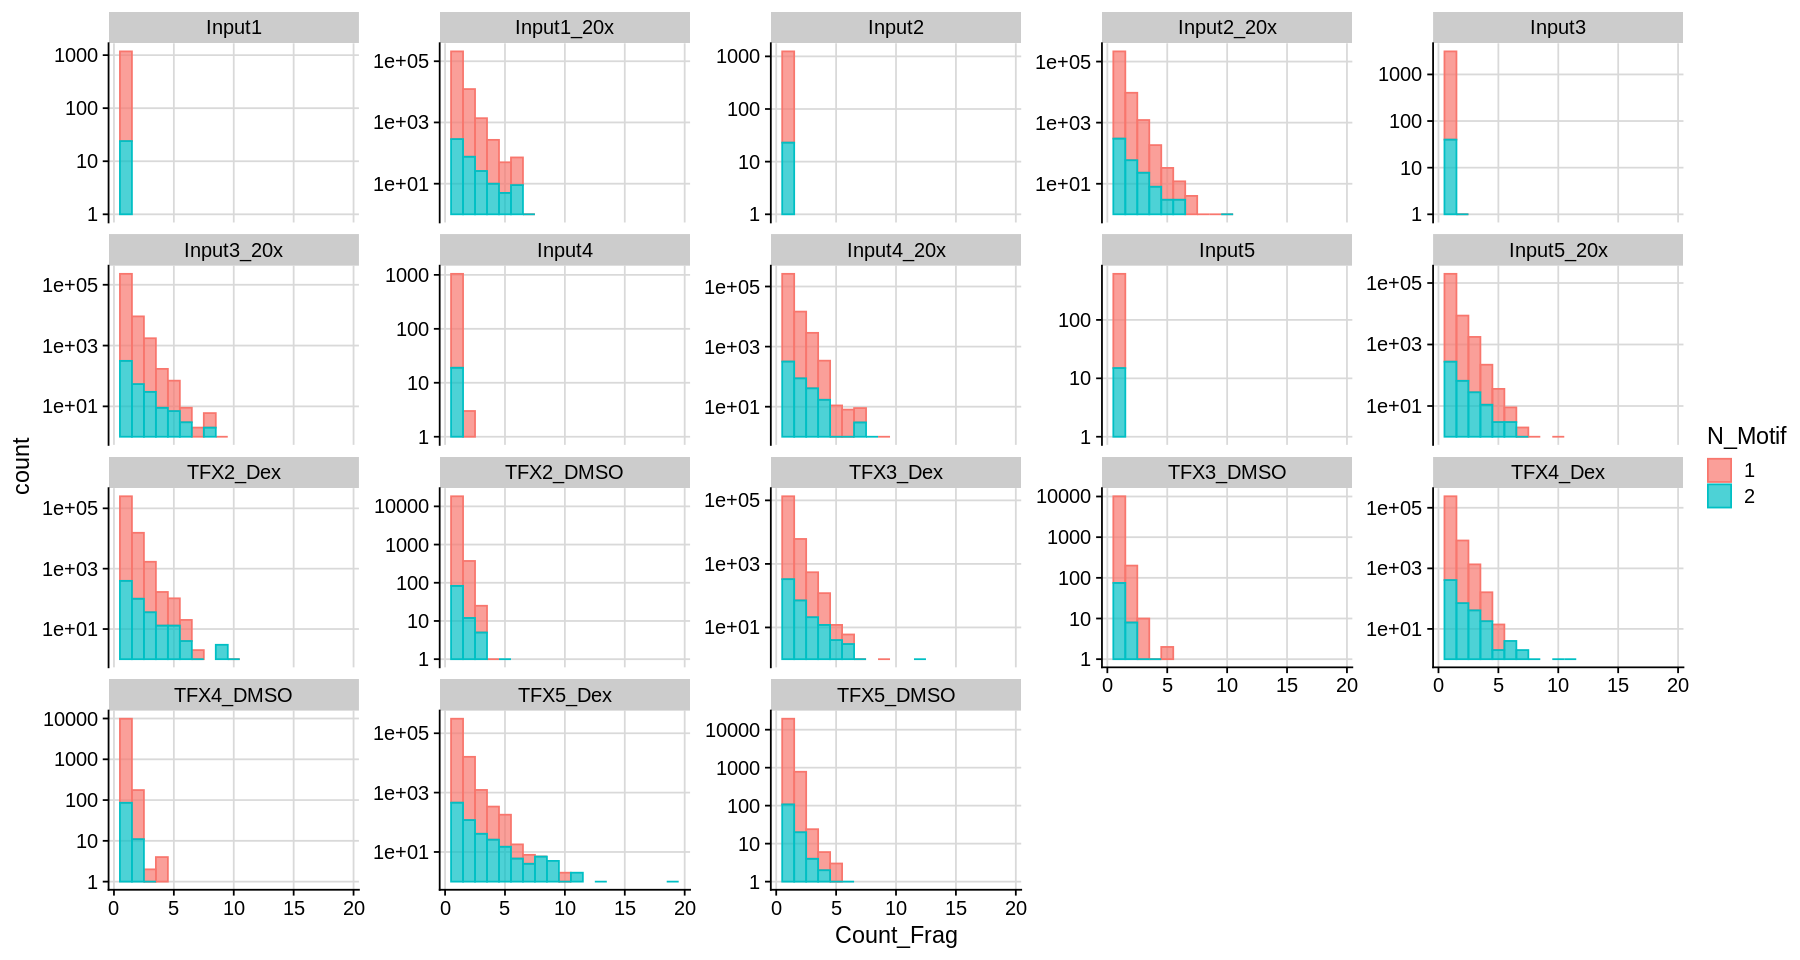

In [12]:
options(repr.plot.height=8, repr.plot.width=15)
tmp = dat %>% mutate(N_Motif = as.character(N_Motif))
gpt = ggplot(tmp, aes(x=Count_Frag, group=N_Motif, color=N_Motif, fill=N_Motif)) + 
    geom_histogram(binwidth=1, alpha=0.7) +
    scale_y_log10() +
    theme_cowplot() + 
    background_grid() +
    facet_wrap(~Sample, scale="free_y")
print(gpt)

## Set up linear model

In [13]:
### set samples
SAMPLES0 = c(
    paste0("Input", 1:5),
    paste0("Input", 1:5, "_20x"),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

SAMPLES1 = c(
    paste0("Input", 1:5),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

SAMPLES2 = c(
    paste0("Input", 1:5, "_20x"),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

In [14]:
### Helper function
### https://win-vector.com/2014/05/30/trimming-the-fat-from-glm-models-in-r/
stripGlmLR = function(cm) {
  cm$y = c()
  cm$model = c()
  
  cm$residuals = c()
  cm$fitted.values = c()
  cm$effects = c()
  cm$qr$qr = c()  
  cm$linear.predictors = c()
  cm$weights = c()
  cm$prior.weights = c()
  cm$data = c()

  cm$family$variance = c()
  cm$family$dev.resids = c()
  cm$family$aic = c()
  cm$family$validmu = c()
  cm$family$simulate = c()
  attr(cm$terms,".Environment") = c()
  attr(cm$formula,".Environment") = c()
  
  return(cm)
}

**RUN**

In [15]:
names(lst_frag)

[1] "AHR"           "AIRE"          "AP1/1"         "AP1/2"        
  [5] "BATF"          "BCL6/1"        "BCL6/2"        "CCAAT/CEBP"   
  [9] "CENBP"         "CPEB1"         "CREB/ATF/1"    "CREB/ATF/2"   
 [13] "CREB/ATF/3"    "CREB3/XBP1"    "CTCF"          "CUX/1"        
 [17] "CUX/2"         "DDIT3+CEBPA"   "E2F/1"         "E2F/2"        
 [21] "E2F/3"         "E2F/4"         "EBF1"          "Ebox/CACCTG"  
 [25] "Ebox/CACGTG/1" "Ebox/CACGTG/2" "Ebox/CAGATGG"  "Ebox/CAGCTG"  
 [29] "Ebox/CATATG"   "EGR"           "ETS/1"         "ETS/2"        
 [33] "EVI1/MECOM"    "EWSR1/FLI1"    "FEZF1"         "FOX/1"        
 [37] "FOX/2"         "FOX/3"         "FOX/4"         "FOX/5"        
 [41] "FOX/7"         "FOX/9"         "GATA"          "GC-tract"     
 [45] "GCM"           "GFI"           "GLI"           "GLIS"         
 [49] "GMEB2/1"       "GMEB2/2"       "GRHL"          "HAND1"        
 [53] "HD/10"         "HD/12"         "HD/13"         "HD/14"        
 [57] "HD/15"         "HD/16"         "HD/18"         "HD/2"         
 [61] "HD/20"         "HD/21"         "HD/22"         "HD/23"        
 [65] "HD/25"         "HD/4"          "HD/5"          "HD/7"         
 [69] "HD/8"          "HEN1"          "HIC/1"         "HIC/2"        
 [73] "HIF"           "HINFP1/1"      "HINFP1/2"      "HINFP1/3"     
 [77] "HLTF"          "HSF"           "INSM1"         "IRF/1"        
 [81] "IRF/2"         "IRF/3"         "IRF/4"         "KLF/SP/1"     
 [85] "KLF/SP/2"      "KLF/SP/3"      "LEF1"          "LIN54"        
 [89] "MAF"           "MBD2"          "MECP2"         "MEF2"         
 [93] "MFZ1"          "MIES"          "MTF1"          "MYB/1"        
 [97] "MYB/2"         "MYB/5"         "MZF1"          "NFAC/2"       
[101] "NFAT/1"        "NFAT/2"        "NFAT/4"        "NFI/1"        
[105] "NFI/2"         "NFI/3"         "NFKB/1"        "NFKB/2"       
[109] "NFKB/3"        "NFY"           "NR/1"          "NR/10"        
[113] "NR/11"         "NR/12"         "NR/13"         "NR/14"        
[117] "NR/15"         "NR/16"         "NR/17"         "NR/18"        
[121] "NR/19"         "NR/2"          "NR/20"         "NR/3"         
[125] "NR/4"          "NR/5"          "NR/7"          "NR/8"         
[129] "NR/9"          "NR2E3"         "NRF1"          "OCT4+SOX2"    
[133] "OSR2"          "OVOL1"         "P53-like/1"    "PAX-halfsite" 
[137] "PAX/1"         "PAX/2"         "PLAG1"         "POU/1"        
[141] "POU/2"         "POU/3"         "PRDM1"         "PRDM4"        
[145] "RBPJ"          "REL-halfsite"  "REST/NRSF"     "RFX/1"        
[149] "RFX/2"         "RFX/3"         "RUNX/1"        "RUNX/2"       
[153] "SCRT1"         "SIX/1"         "SIX/2"         "SMAD"         
[157] "SMARCA1"       "SMARCA5"       "SNAI2"         "SOX/1"        
[161] "SOX/2"         "SOX/3"         "SOX/4"         "SOX/5"        
[165] "SOX/6"         "SPDEF/1"       "SPDEF/2"       "SPI"          
[169] "SPZ1"          "SREBF1"        "SRF"           "STAT/1"       
[173] "STAT/2"        "TBX/1"         "TBX/2"         "TBX/3"        
[177] "TBX/4"         "TCF/LEF"       "TEAD"          "TFAP2/1"      
[181] "TFAP2/2"       "THAP1"         "YY1"           "ZBTB14"       
[185] "ZBTB48"        "ZBTB49"        "ZBTB6"         "ZBTB7A"       
[189] "ZFN121"        "ZFX"           "ZIC"           "ZIC/2"        
[193] "ZIM3"          "ZKSCAN1"       "ZNF134"        "ZNF136"       
[197] "ZNF140"        "ZNF143"        "ZNF232"        "ZNF24"        
[201] "ZNF250"        "ZNF257"        "ZNF274"        "ZNF28"        
[205] "ZNF282"        "ZNF306"        "ZNF317"        "ZNF320"       
[209] "ZNF324"        "ZNF329"        "ZNF331"        "ZNF332"       
[213] "ZNF335"        "ZNF354"        "ZNF382"        "ZNF384/1"     
[217] "ZNF384/2"      "ZNF41"         "ZNF410"        "ZNF418"       
[221] "ZNF423"        "ZNF436"        "ZNF449"        "ZNF490"       
[225] "ZNF524"        "ZNF528"        "ZNF53"         "ZNF547"       
[229] "ZNF54

In [16]:
lst_motif_pair = list("AP1/1|NR/20" = c("AP1/1", "NR/20"))
lst_motif_pair

$`AP1/1|NR/20`
[1] "AP1/1" "NR/20"

In [23]:
### combination of motifs
dat_comb = t(combn(names(lst_frag), 2))
print(head(dat_comb))
print("++++++++++++++++++++++++++++++")
### convert motif pairs into a list
lst_motif_pair = split(dat_comb, seq(nrow(dat_comb)))
print(lst_motif_pair[[1]])

     [,1]  [,2]    
[1,] "AHR" "AIRE"  
[2,] "AHR" "AP1/1" 
[3,] "AHR" "AP1/2" 
[4,] "AHR" "BATF"  
[5,] "AHR" "BCL6/1"
[6,] "AHR" "BCL6/2"
[1] "++++++++++++++++++++++++++++++"
[1] "AHR"  "AIRE"


**Compare old input and new input (deeper)**

In [ ]:
### start
#registerDoParallel(10)
timer_start = Sys.time()

### loop through each pair of motifs
### estimate interaction effect of each motif pair
lst_res_old = lapply(lst_motif_pair, function(x){

    ### extract fragments for each motif
    mtf1 = x[1]
    mtf2 = x[2]
    df1 = lst_frag[[mtf1]]
    df2 = lst_frag[[mtf2]]
    
    ### extract fragments
    dat1 = bind_rows(df1, df2) %>% 
        dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample) %>%
        distinct
    dat2 = df1 %>% 
        dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample, Motif)
    dat3 = df2 %>% 
        dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample, Motif)
    
    ### match fragments for the motif pair
    dat = dat1 %>%
        full_join(dat2, by = c("Chrom_Frag", "Start_Frag", "End_Frag", "Count_Frag", "Sample")) %>%
        full_join(dat3, by = c("Chrom_Frag", "Start_Frag", "End_Frag", "Count_Frag", "Sample")) %>%
        mutate(Motif = paste(Motif.x, Motif.y, sep = "_")) %>%
        mutate(Motif = str_remove(string=Motif, pattern="_NA|NA_")) %>% 
        mutate(Group = str_remove(string = Sample, pattern = "[0-9]")) %>%
        mutate(X     = paste(Group, Motif, sep="_")) %>%
        mutate(X     = ifelse(str_detect(X, "Input"), "Input", X))
    
    ### summarize into counts
    ### normalize counts by library size
    tmp = dat %>% 
        group_by(Sample, X) %>% 
        summarise(Value = sum(Count_Frag), .groups = 'drop')
    tmp = tmp %>% left_join(dat_lib, by="Sample")
    tmp = tmp %>%
        mutate(Norm_Value    = Value / Size) %>% 
        mutate(Lognorm_Value = log10(Value) - log10(Size))
    
    ### choose
    tmp = tmp %>% dplyr::filter(Sample %in% SAMPLES1)
    #print(head(tmp))
    
    ### create design matrix
    ### annotate fragments based on motif annotation
    idx11 = paste("TFX_DMSO", mtf1,       sep="_")
    idx12 = paste("TFX_DMSO", mtf2,       sep="_")
    idx13 = paste("TFX_DMSO", mtf1, mtf2, sep="_")
    idx21 = paste("TFX_Dex",  mtf1,       sep="_")
    idx22 = paste("TFX_Dex",  mtf2,       sep="_")
    idx23 = paste("TFX_Dex",  mtf1, mtf2, sep="_")
    idxs  = c("Input", idx11, idx12, idx21, idx22, idx13, idx23)
    tmp$X = factor(tmp$X, levels=idxs)
    X = model.matrix(~X, tmp)
    y = tmp$Norm_Value
    
    ### arrange design matrix
    idx11 = paste("XTFX_DMSO", mtf1,       sep="_")
    idx12 = paste("XTFX_DMSO", mtf2,       sep="_")
    idx13 = paste("XTFX_DMSO", mtf1, mtf2, sep="_")
    idx21 = paste("XTFX_Dex",  mtf1,       sep="_")
    idx22 = paste("XTFX_Dex",  mtf2,       sep="_")
    idx23 = paste("XTFX_Dex",  mtf1, mtf2, sep="_")
    X[,idx11] = X[,idx11] + X[,idx13] + X[,idx21] + X[,idx23]
    X[,idx12] = X[,idx12] + X[,idx13] + X[,idx22] + X[,idx23]
    X[,idx21] = X[,idx21] + X[,idx23]
    X[,idx22] = X[,idx22] + X[,idx23]
    X[,idx13] = X[,idx13] + X[,idx23]
    
    ### fit model and get the summary
    fit = lm(y ~ X + 0)
    #res = summary(fit)
    
    ### reduce the memory size
    #res = stripGlmLR(res)
    lst = list(fit=fit, X=X, y=y, data=tmp)
    return(lst)
})

### print end message
timer = Sys.time()
cat("Done!\n")
print(timer - timer_start)

In [ ]:
### start
#registerDoParallel(10)
timer_start = Sys.time()

### loop through each pair of motifs
### estimate interaction effect of each motif pair
lst_res_new = lapply(lst_motif_pair, function(x){

    ### extract fragments for each motif
    mtf1 = x[1]
    mtf2 = x[2]
    df1 = lst_frag[[mtf1]]
    df2 = lst_frag[[mtf2]]
    
    ### extract fragments
    dat1 = bind_rows(df1, df2) %>% 
        dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample) %>%
        distinct
    dat2 = df1 %>% 
        dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample, Motif)
    dat3 = df2 %>% 
        dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample, Motif)
    
    ### match fragments for the motif pair
    dat = dat1 %>%
        full_join(dat2, by = c("Chrom_Frag", "Start_Frag", "End_Frag", "Count_Frag", "Sample")) %>%
        full_join(dat3, by = c("Chrom_Frag", "Start_Frag", "End_Frag", "Count_Frag", "Sample")) %>%
        mutate(Motif = paste(Motif.x, Motif.y, sep = "_")) %>%
        mutate(Motif = str_remove(string=Motif, pattern="_NA|NA_")) %>% 
        mutate(Group = str_remove(string = Sample, pattern = "[0-9]")) %>%
        mutate(X     = paste(Group, Motif, sep="_")) %>%
        mutate(X     = ifelse(str_detect(X, "Input"), "Input", X))
    
    ### summarize into counts
    ### normalize counts by library size
    tmp = dat %>% 
        group_by(Sample, X) %>% 
        summarise(Value = sum(Count_Frag), .groups = 'drop')
    tmp = tmp %>% left_join(dat_lib, by="Sample")
    tmp = tmp %>%
        mutate(Norm_Value    = Value / Size) %>% 
        mutate(Lognorm_Value = log10(Value) - log10(Size))
    
    ### choose
    tmp = tmp %>% dplyr::filter(Sample %in% SAMPLES2)
    #print(head(tmp))
    
    ### create design matrix
    ### annotate fragments based on motif annotation
    idx11 = paste("TFX_DMSO", mtf1,       sep="_")
    idx12 = paste("TFX_DMSO", mtf2,       sep="_")
    idx13 = paste("TFX_DMSO", mtf1, mtf2, sep="_")
    idx21 = paste("TFX_Dex",  mtf1,       sep="_")
    idx22 = paste("TFX_Dex",  mtf2,       sep="_")
    idx23 = paste("TFX_Dex",  mtf1, mtf2, sep="_")
    idxs  = c("Input", idx11, idx12, idx21, idx22, idx13, idx23)
    tmp$X = factor(tmp$X, levels=idxs)
    X = model.matrix(~X, tmp)
    y = tmp$Norm_Value
    
    ### arrange design matrix
    idx11 = paste("XTFX_DMSO", mtf1,       sep="_")
    idx12 = paste("XTFX_DMSO", mtf2,       sep="_")
    idx13 = paste("XTFX_DMSO", mtf1, mtf2, sep="_")
    idx21 = paste("XTFX_Dex",  mtf1,       sep="_")
    idx22 = paste("XTFX_Dex",  mtf2,       sep="_")
    idx23 = paste("XTFX_Dex",  mtf1, mtf2, sep="_")
    X[,idx11] = X[,idx11] + X[,idx13] + X[,idx21] + X[,idx23]
    X[,idx12] = X[,idx12] + X[,idx13] + X[,idx22] + X[,idx23]
    X[,idx21] = X[,idx21] + X[,idx23]
    X[,idx22] = X[,idx22] + X[,idx23]
    X[,idx13] = X[,idx13] + X[,idx23]
    
    ### fit model and get the summary
    fit = lm(y ~ X + 0)
    #res = summary(fit)
    
    ### reduce the memory size
    #res = stripGlmLR(res)
    lst = list(fit=fit, X=X, y=y, data=tmp)
    return(lst)
})

### print end message
timer = Sys.time()
cat("Done!\n")
print(timer - timer_start)

In [20]:
### start
#registerDoParallel(10)
timer_start = Sys.time()

###
lst_tmp     = lst_frag #head(lst_frag, 10)
lst_res_old = foreach(idn = names(lst_tmp), .combine = append) %do% {
    ### set environment
    require(tidyverse)
    
    ### extract
    dat = lst_tmp[[idn]]
    
    ### extract fragments for each motif
    mtf1 = x[1]
    mtf2 = x[2]
    df1 = lst_frag[[mtf1]]
    df2 = lst_frag[[mtf2]]
    
    ### extract fragments
    dat1 = bind_rows(df1, df2) %>% 
        dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample) %>%
        distinct
    dat2 = df1 %>% 
        dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample, Motif)
    dat3 = df2 %>% 
        dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample, Motif)
    
    ### match fragments for the motif pair
    dat = dat1 %>%
        full_join(dat2, by = c("Chrom_Frag", "Start_Frag", "End_Frag", "Count_Frag", "Sample")) %>%
        full_join(dat3, by = c("Chrom_Frag", "Start_Frag", "End_Frag", "Count_Frag", "Sample")) %>%
        mutate(Motif = paste(Motif.x, Motif.y, sep = "_")) %>%
        mutate(Motif = str_remove(string=Motif, pattern="_NA|NA_")) %>% 
        mutate(Group = str_remove(string = Sample, pattern = "[0-9]")) %>%
        mutate(X     = paste(Group, Motif, sep="_")) %>%
        mutate(X     = ifelse(str_detect(X, "Input"), "Input", X))
    
    ### summarize into counts
    ### normalize counts by library size
    tmp = dat %>% 
        group_by(Sample, X) %>% 
        summarise(Value = sum(Count_Frag), .groups = 'drop')
    tmp = tmp %>% left_join(dat_lib, by="Sample")
    tmp = tmp %>%
        mutate(Norm_Value    = Value / Size) %>% 
        mutate(Lognorm_Value = log10(Value) - log10(Size))
    
    ### choose
    tmp = tmp %>% dplyr::filter(Sample %in% SAMPLES2)
    #print(head(tmp))
    
    ### create design matrix
    ### annotate fragments based on motif annotation
    idx11 = paste("TFX_DMSO", mtf1,       sep="_")
    idx12 = paste("TFX_DMSO", mtf2,       sep="_")
    idx13 = paste("TFX_DMSO", mtf1, mtf2, sep="_")
    idx21 = paste("TFX_Dex",  mtf1,       sep="_")
    idx22 = paste("TFX_Dex",  mtf2,       sep="_")
    idx23 = paste("TFX_Dex",  mtf1, mtf2, sep="_")
    idxs  = c("Input", idx11, idx12, idx21, idx22, idx13, idx23)
    tmp$X = factor(tmp$X, levels=idxs)
    X = model.matrix(~X, tmp)
    y = tmp$Norm_Value
    
    ### arrange design matrix
    idx11 = paste("XTFX_DMSO", mtf1,       sep="_")
    idx12 = paste("XTFX_DMSO", mtf2,       sep="_")
    idx13 = paste("XTFX_DMSO", mtf1, mtf2, sep="_")
    idx21 = paste("XTFX_Dex",  mtf1,       sep="_")
    idx22 = paste("XTFX_Dex",  mtf2,       sep="_")
    idx23 = paste("XTFX_Dex",  mtf1, mtf2, sep="_")
    X[,idx11] = X[,idx11] + X[,idx13] + X[,idx21] + X[,idx23]
    X[,idx12] = X[,idx12] + X[,idx13] + X[,idx22] + X[,idx23]
    X[,idx21] = X[,idx21] + X[,idx23]
    X[,idx22] = X[,idx22] + X[,idx23]
    X[,idx13] = X[,idx13] + X[,idx23]
    
    ### fit model and get the summary
    fit = lm(y ~ X + 0)
    #res = summary(fit)
    
    ### reduce the memory size
    #res = stripGlmLR(res)
    lst = list(fit=fit, X=X, y=y, data=tmp)
    return(lst)
    
    ### arrange
    lst = list()
    lst[[idn]] = res
    #lst[[idn]] = list()
    #lst[[idn]]$res = res
    #lst[[idn]]$cnt = dat
    #lst[[idn]]$X   = X
    #lst[[idn]]$y   = y
    lst
}

### print end message
timer = Sys.time()
cat("Done!\n")
print(timer - timer_start)

Done!
Time difference of 6.055232 secs


In [21]:
### start
#registerDoParallel(10)
timer_start = Sys.time()

###
lst_tmp     = lst_frag #head(lst_frag, 10)
lst_res_new = foreach(idn = names(lst_tmp), .combine = append) %do% {
    ### set environment
    require(tidyverse)
    
    ### extract
    dat = lst_tmp[[idn]]
    
    ### get fragments
    dat = dat %>% 
        dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample) %>%
        distinct()

    ### count
    dat = dat %>% group_by(Sample) %>% summarise(Value = sum(Count_Frag))
    
    ### choose
    dat = dat %>% dplyr::filter(Sample %in% SAMPLES2)
    
    ### normalize counts by library size
    dat = dat %>% left_join(dat_lib, by="Sample")
    dat = dat %>%
        mutate(Norm_Value    = Value / Size) %>% 
        mutate(Lognorm_Value = log10(Value) - log10(Size)) %>%
        mutate(X = Group)

    ### create design matrix
    idxs  = c("Input", "TFX_DMSO", "TFX_Dex")
    dat$X = factor(dat$X, levels=idxs)
    X = model.matrix(~X, dat)
    X[,"XTFX_DMSO"] = X[,"XTFX_DMSO"] + X[,"XTFX_Dex"]
    y = dat$Norm_Value

    ### fit model and get the summary
    fit = lm(y ~ X + 0)
    res = summary(fit)
    
    ### reduce the memory size
    res = stripGlmLR(res)
    
    ### arrange
    lst = list()
    lst[[idn]] = res
    #lst[[idn]] = list()
    #lst[[idn]]$res = res
    #lst[[idn]]$cnt = dat
    #lst[[idn]]$X   = X
    #lst[[idn]]$y   = y
    lst
}

### print end message
timer = Sys.time()
cat("Done!\n")
print(timer - timer_start)

Done!
Time difference of 5.699008 secs


## Visualize

In [22]:
fun = function(motifs){
    res = sapply(motifs, function(motif){
        if (motif == "NR/20"){ return("red") }
        if (motif == "AP1/1"){ return("blue") }
        return("grey50")
    })
    return(res)
}

In [23]:
lst_dat = list(lst_res_old, lst_res_new)
lst_dat = lapply(lst_dat, function(lst_res){
    ###
    lst = lapply(names(lst_res), function(mtf){
        res = lst_res[[mtf]]
        dat = as.data.frame(coef(res))
        dat = rownames_to_column(dat, var="X")
        dat$Motif = mtf
        return(dat)
    })
    
    ###
    dat = bind_rows(lst)
    dat = dat %>% dplyr::filter(str_detect(X, "Intercept", negate = TRUE))
    dat$Color = fun(dat$Motif)
    dat$X = factor(dat$X, levels=c("XXTFX_DMSO", "XXTFX_Dex"))
    return(dat)
})

In [24]:
lst_dat = lapply(lst_dat, function(dat){
    dat$adj_pval = p.adjust(dat$`Pr(>|t|)`, method = "BH")
    return(dat)
})

In [25]:
head(lst_dat[[1]])

,X,Estimate,Std. Error,t value,Pr(>|t|),Motif,Color,adj_pval
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,XXTFX_DMSO,8.117376e-06,8.704893e-07,9.3250729,3.004418e-06,AHR,grey50,7.795332e-06
2,XXTFX_Dex,6.594031e-06,9.175763e-07,7.1863575,2.973756e-05,AHR,grey50,6.639083e-05
3,XXTFX_DMSO,-3.796510e-07,1.009593e-07,-3.7604357,4.481997e-03,AIRE,grey50,5.959442e-03
4,XXTFX_Dex,-9.053152e-08,1.055858e-07,-0.8574216,4.134608e-01,AIRE,grey50,4.449802e-01
5,XXTFX_DMSO,3.808964e-06,8.061843e-07,4.7246816,8.106745e-04,AP1/1,blue,1.212224e-03
6,XXTFX_Dex,1.511174e-05,8.497928e-07,17.7828497,6.746911e-09,AP1/1,blue,7.966769e-08


In [28]:
lst_gpt = lapply(lst_dat, function(dat){
    gpt = ggplot(dat, aes(x=Estimate, y=-log10(`Pr(>|t|)`))) + 
        geom_point(size=0.7, color=dat$Color) + 
        geom_hline(yintercept = 2, color="red", alpha=0.5) +
        labs(x="Estimate", y="-log10(adj. p-value (BH))") +
        theme_bw() + 
        facet_wrap(~X)
    return(gpt)
})
lst_gpt[[1]] = lst_gpt[[1]] + ggtitle("Old Input")
lst_gpt[[2]] = lst_gpt[[2]] + ggtitle("New Input (Deeper)")

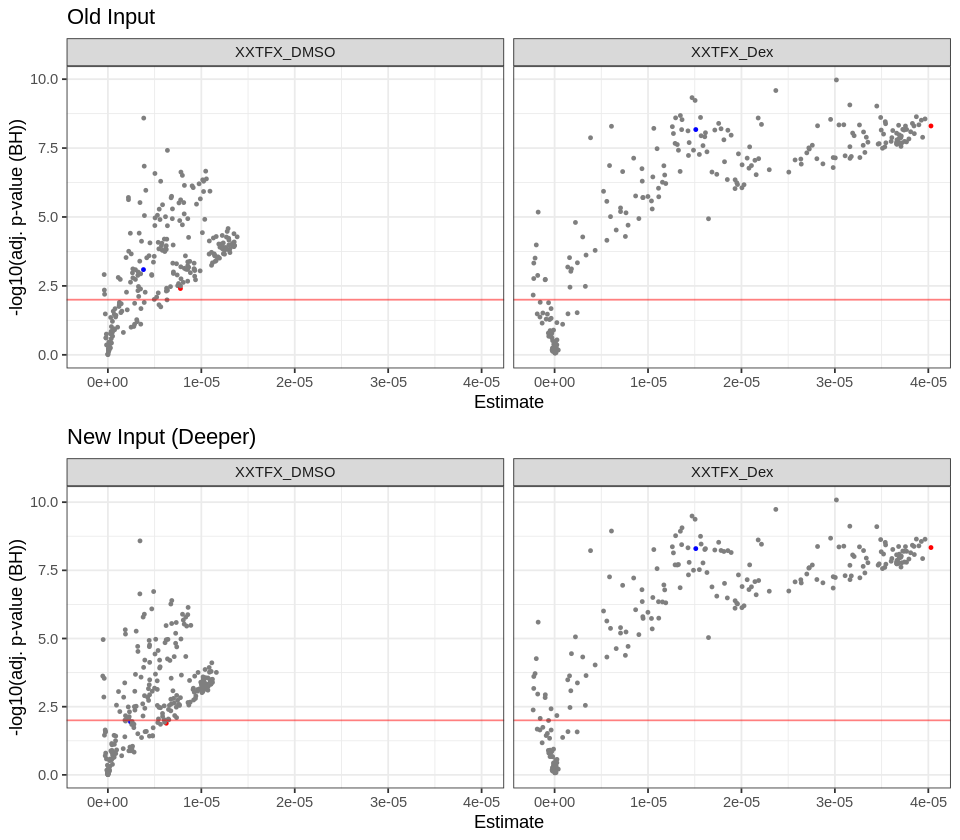

In [33]:
options(repr.plot.height=7, repr.plot.width=8)
grid.arrange(grobs = lst_gpt, ncol = 1)